In [3]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [7]:
df=pd.read_csv("Week8_Iris.csv")# load the dataset
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [11]:
print(df.shape)

(150, 6)


In [12]:
print(df.dtypes)

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


In [13]:
print(df.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [14]:
print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [15]:
print(df.tail())

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica  


In [20]:
print(df.nunique())

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64


In [23]:
print(df.value_counts())
print("\n\nnull values\n\n")
print(df.isnull().sum())

Id   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species        
1    5.1            3.5           1.4            0.2           Iris-setosa        1
95   5.6            2.7           4.2            1.3           Iris-versicolor    1
97   5.7            2.9           4.2            1.3           Iris-versicolor    1
98   6.2            2.9           4.3            1.3           Iris-versicolor    1
99   5.1            2.5           3.0            1.1           Iris-versicolor    1
                                                                                 ..
51   7.0            3.2           4.7            1.4           Iris-versicolor    1
52   6.4            3.2           4.5            1.5           Iris-versicolor    1
53   6.9            3.1           4.9            1.5           Iris-versicolor    1
54   5.5            2.3           4.0            1.3           Iris-versicolor    1
150  5.9            3.0           5.1            1.8           Iris-virginica    

In [25]:
df=df.drop(columns=['Id'])


In [27]:
print(df.columns)

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [28]:
print(df.describe())

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


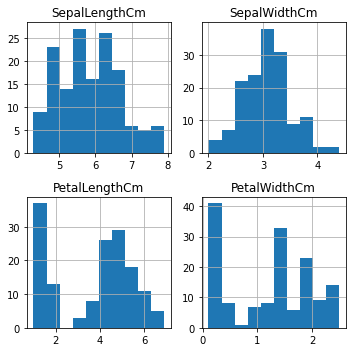

In [49]:
df.hist(figsize=(5,5))
plt.tight_layout()
plt.show()


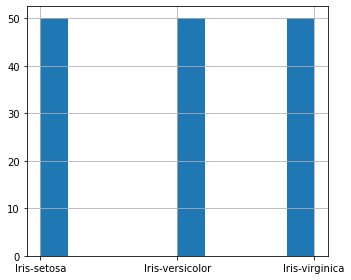

In [50]:
df.iloc[:,-1].hist(figsize=(5,4))
plt.tight_layout()
plt.show()


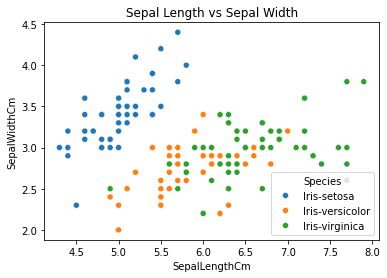

In [43]:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue=df['Species'], data=df)
plt.title("Sepal Length vs Sepal Width")
plt.show()


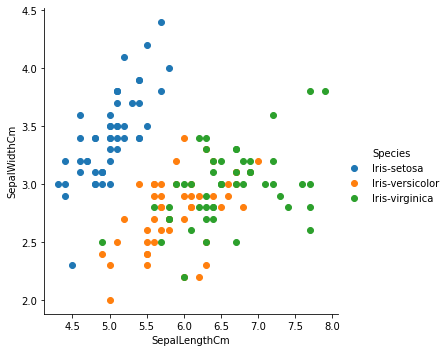

In [45]:
g = sns.FacetGrid(df, hue="Species", height=5)
g.map(plt.scatter, "SepalLengthCm", "SepalWidthCm")
g.add_legend()
plt.show()


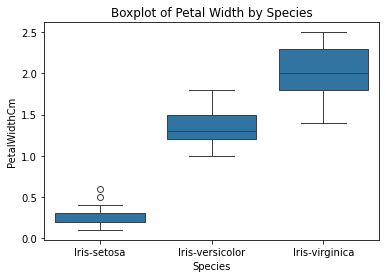

In [53]:
sns.boxplot(x='Species', y='PetalWidthCm', data=df)
plt.title("Boxplot of Petal Width by Species")
plt.show()


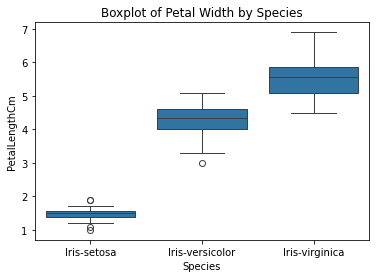

In [54]:
sns.boxplot(x='Species', y='PetalLengthCm', data=df)
plt.title("Boxplot of Petal Width by Species")
plt.show()


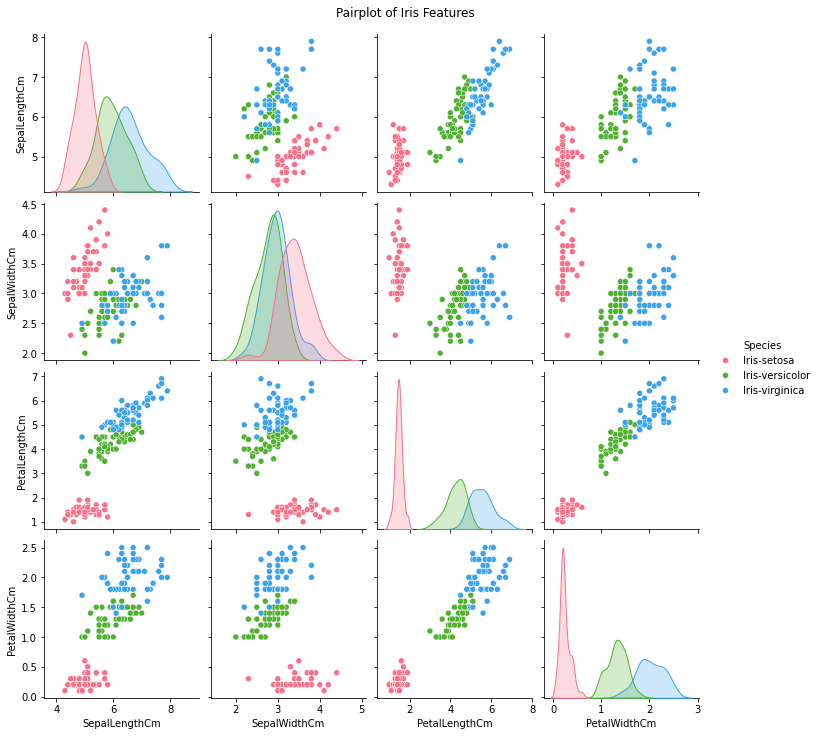

In [56]:
sns.pairplot(df, hue='Species', palette='husl')
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()



               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000


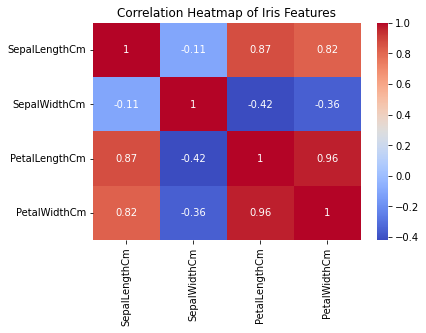

In [59]:
numeric_df = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

# Print correlation matrix
print(numeric_df.corr())

# Plot heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Iris Features")
plt.show()


In [61]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [63]:
help(SVC)


Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer or
 |  other :ref:`kernel_approximation`.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `g

In [64]:
model = SVC(C=1)


In [65]:
model.fit(X_train, y_train)

SVC(C=1)

In [66]:
y_pred = model.predict(X_test)

In [67]:
print(confusion_matrix(y_test, y_pred))

[[14  0  0]
 [ 0 17  1]
 [ 0  0 13]]


In [68]:
print(classification_report(y_test, y_pred))


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [69]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9777777777777777
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [70]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)
print("K-Fold CV scores:", scores)
print("Mean Accuracy:", scores.mean())


K-Fold CV scores: [0.96666667 0.96666667 0.96666667 0.93333333 1.        ]
Mean Accuracy: 0.9666666666666666


In [71]:
param_grid = {'C': [0.1, 1, 10, 100, 1000]}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=0)
grid.fit(X_train, y_train)


GridSearchCV(estimator=SVC(), param_grid={'C': [0.1, 1, 10, 100, 1000]})

In [72]:
grid = GridSearchCV(SVC(), param_grid, cv=5)


In [73]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Feature columns
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
# Target column
y = df['Species']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit the decision tree model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Print accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, None]
}

# Create GridSearchCV object
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)

# Fit the model (this is required before accessing cv_results_)
grid.fit(X_train, y_train)

# Now you can access cv_results_
means = grid.cv_results_['mean_test_score']
params = grid.cv_results_['params']

# Print mean score and params
for mean, param in zip(means, params):
    print(f"{param}: {mean:.3f}")



{'criterion': 'gini', 'max_depth': 3}: 0.933
{'criterion': 'gini', 'max_depth': 5}: 0.924
{'criterion': 'gini', 'max_depth': None}: 0.933
{'criterion': 'entropy', 'max_depth': 3}: 0.933
{'criterion': 'entropy', 'max_depth': 5}: 0.924
{'criterion': 'entropy', 'max_depth': None}: 0.924


In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {'C': [0.1, 1, 10, 100, 1000]}  # This must match
grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVC(), param_grid={'C': [0.1, 1, 10, 100, 1000]})

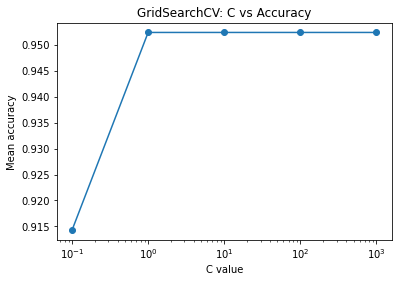

In [80]:
C_values = [param['C'] for param in grid.cv_results_['params']]
means = grid.cv_results_['mean_test_score']

plt.plot(C_values, means, marker='o')
plt.xscale('log')
plt.xlabel("C value")
plt.ylabel("Mean accuracy")
plt.title("GridSearchCV: C vs Accuracy")
plt.show()


In [81]:
print("Best Estimator:", grid.best_estimator_)
print("Best Score:", grid.best_score_)


Best Estimator: SVC(C=1)
Best Score: 0.9523809523809523
